# Terrain DataManager

## Standard Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn
%matplotlib inline
import pandas as pd
import pprint
import math
import random
# from tabulate import tabulate

## Loading the Data

## Steps
1. Load label names in a dictionary called 'dict_terrains'
2. Load number of files in pd.Series
3. Join all Series to a pd.Dataframe

In [8]:
projectpath = "/home/lokeshmishra/PaleBlueDot/BernPhD/Projects/Terrain_Classifier/terrain_classifier"
terrains = os.listdir(projectpath + '/tiles')
foldnames = os.listdir(projectpath + '/tiles/' + terrains[0])

In [9]:
dict_terrains = {}
dict_foldnames = {}
for key,value in enumerate(terrains):
    dict_terrains[key] =  value
for key,value in enumerate(foldnames):
    dict_foldnames[key] = value
print(dict_terrains)
print(dict_foldnames)

{0: 'Water', 1: 'Mountains', 2: 'Polar_Caps', 3: 'Forest', 4: 'Desert'}
{0: 'test', 1: 'train', 2: 'validation'}


In [10]:
# Creating dataframe
indlist, collist = [],[] #will store name of indices (rows) and columns
numbertable,filenametable = pd.DataFrame([]) ,pd.DataFrame([]) 
temp1, temp2 = pd.Series([]), pd.Series([])
temp2 = pd.Series([])
for ind1, val1 in enumerate(terrains):
    collist.append(val1)
    numberfiles = []
    namefiles = []
    for ind2,val2 in enumerate(foldnames):
        currentdir = projectpath + '/tiles/' + val1 + '/' + val2
        files = os.listdir(currentdir)
        numberfiles.append(len(files))
        namefiles.append(files)
        while val2 not in indlist:
            indlist.append(val2)       
    temp1= pd.Series(numberfiles,name=val1)
    temp2= pd.Series(namefiles,name=val1)
    numbertable[val1] = temp1
    filenametable[val1] = temp2

numbertable.index=indlist
filenametable.index=indlist
print('Let\'s look at the data: ')
display(filenametable, numbertable)

Let's look at the data: 


,Water,Mountains,Polar_Caps,Forest,Desert
test,"[7_7_8.jpg, 3_5_8.jpg, 6_4_8.jpg, 7_2_8.jpg, 4...","[7_7_8.jpg, 20_1_8.jpg, 13_3_8.jpg, 16_6_8.jpg...","[7_7_8.jpg, 8_0_8.jpg, 3_5_8.jpg, 6_4_8.jpg, 7...","[6_4_8.jpg, 4_1_8.jpg, 1_4_8.jpg, 5_9_8.jpg, 5...","[21_3_8.jpg, 21_1_8.jpg, 7_7_8.jpg, 40_0_8.jpg..."
train,"[4_6_4.jpg, 3_9_3.jpg, 2_9_2.jpg, 0_9_6.jpg, 1...","[9_2_3.jpg, 4_6_4.jpg, 12_5_4.jpg, 19_8_4.jpg,...","[4_6_4.jpg, 3_9_3.jpg, 2_9_2.jpg, 0_9_6.jpg, 1...","[2_9_2.jpg, 1_3_5.jpg, 3_1_5.jpg, 4_2_2.jpg, 1...","[9_2_3.jpg, 4_6_4.jpg, 12_5_4.jpg, 29_5_0.jpg,..."
validation,"[4_9_9.jpg, 5_9_9.jpg, 7_2_9.jpg, 5_1_9.jpg, 0...","[14_5_9.jpg, 9_3_9.jpg, 19_4_9.jpg, 4_9_9.jpg,...","[4_9_9.jpg, 5_9_9.jpg, 8_5_9.jpg, 7_2_9.jpg, 5...","[5_9_9.jpg, 5_1_9.jpg, 5_2_9.jpg, 4_1_9.jpg, 6...","[24_2_9.jpg, 25_6_9.jpg, 31_2_9.jpg, 14_5_9.jp..."


,Water,Mountains,Polar_Caps,Forest,Desert
test,80,210,90,45,420
train,640,1680,720,456,3361
validation,81,213,90,47,425


## Sample images

In [11]:
img0=mpimg.imread(projectpath+'/tiles'+'/'+terrains[0]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[0]][0])
img1=mpimg.imread(projectpath+'/tiles'+'/'+terrains[1]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[1]][0])
img2=mpimg.imread(projectpath+'/tiles'+'/'+terrains[2]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[2]][0])
img3=mpimg.imread(projectpath+'/tiles'+'/'+terrains[3]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[3]][0])
img4=mpimg.imread(projectpath+'/tiles'+'/'+terrains[4]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[4]][0])
# img2 = img[:,:,0]
img0a=mpimg.imread(projectpath+'/tiles'+'/'+terrains[0]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[0]][1])
img1a=mpimg.imread(projectpath+'/tiles'+'/'+terrains[1]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[1]][1])
img2a=mpimg.imread(projectpath+'/tiles'+'/'+terrains[2]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[2]][1])
img3a=mpimg.imread(projectpath+'/tiles'+'/'+terrains[3]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[3]][1])
img4a=mpimg.imread(projectpath+'/tiles'+'/'+terrains[4]+'/'+foldnames[0]+'/'+filenametable.at[foldnames[0],terrains[4]][1])
img0.shape

(1024, 1024, 3)

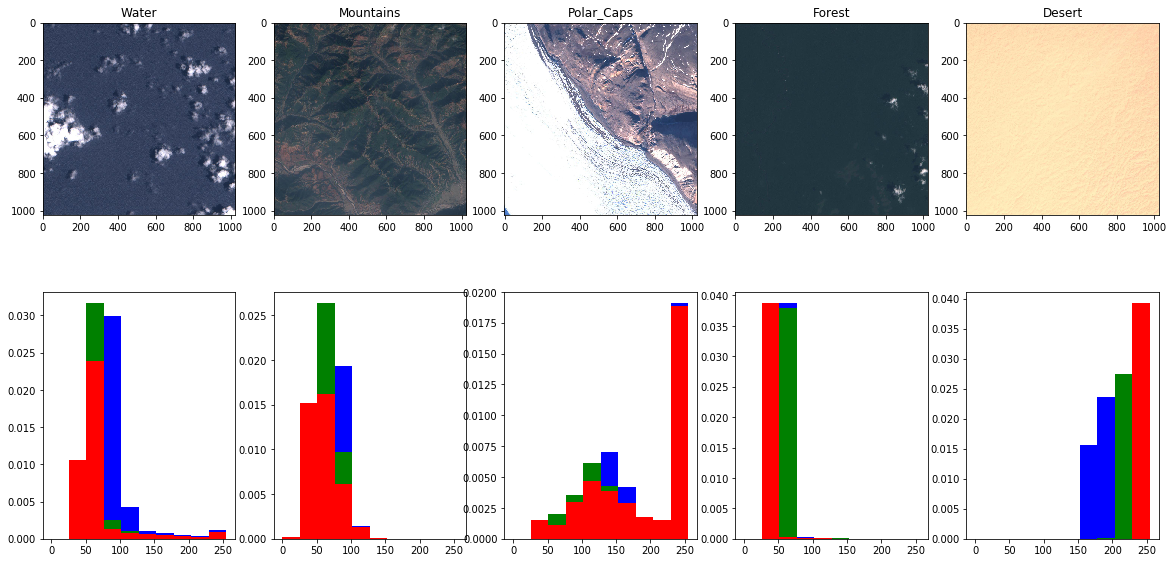

In [12]:
fig = plt.figure(figsize=(20,10))

ax0 = fig.add_subplot(2,5,1)
imgplot0 = plt.imshow(img0)
ax0.set_title(terrains[0])

ax0a = fig. add_subplot(2,5,6)
imgplot0a = plt.hist((img0[:,:,0].ravel(),img0[:,:,1].ravel(),img0[:,:,2].ravel()),range=(0,255),color =('r','g','b'), histtype= 'stepfilled',density =1)

ax1 = fig.add_subplot(2,5,2)
imgplot1 = plt.imshow(img1)
ax1.set_title(terrains[1])

ax1a = fig. add_subplot(2,5,7)
imgplot1a = plt.hist((img1[:,:,0].ravel(),img1[:,:,1].ravel(),img1[:,:,2].ravel()),range=(0,255),color =('r','g','b'), histtype= 'stepfilled',density =1)

ax2 = fig.add_subplot(2,5,3)
imgplot2 = plt.imshow(img2)
ax2.set_title(terrains[2])

ax2a = fig. add_subplot(2,5,8)
imgplot2a = plt.hist((img2[:,:,0].ravel(),img2[:,:,1].ravel(),img2[:,:,2].ravel()),range=(0,255),color =('r','g','b'), histtype= 'stepfilled',density =1)

ax3 = fig.add_subplot(2,5,4)
imgplot3 = plt.imshow(img3)
ax3.set_title(terrains[3])

ax3a = fig. add_subplot(2,5,9)
imgplot3a = plt.hist((img3[:,:,0].ravel(),img3[:,:,1].ravel(),img3[:,:,2].ravel()),range=(0,255),color =('r','g','b'), histtype= 'stepfilled',density =1)

ax4 = fig.add_subplot(2,5,5)
imgplot4 = plt.imshow(img4)
ax4.set_title(terrains[4])

ax4a = fig. add_subplot(2,5,10)
imgplot4a = plt.hist((img4[:,:,0].ravel(),img4[:,:,1].ravel(),img4[:,:,2].ravel()),range=(0,255),color =('r','g','b'), histtype= 'stepfilled',density =1)

plt.show()

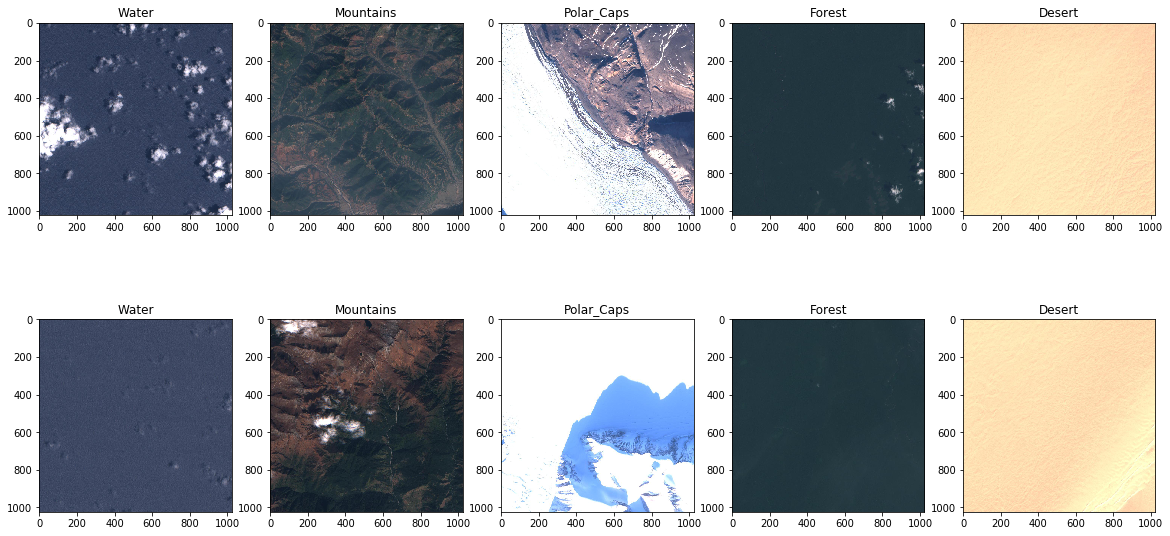

In [13]:
fig = plt.figure(figsize=(20,10))

ax0 = fig.add_subplot(2,5,1)
imgplot0 = plt.imshow(img0)
ax0.set_title(terrains[0])

ax0a = fig. add_subplot(2,5,6)
imgplot0a = plt.imshow(img0a)
ax0a.set_title(terrains[0])


ax1 = fig.add_subplot(2,5,2)
imgplot1 = plt.imshow(img1)
ax1.set_title(terrains[1])

ax1a = fig. add_subplot(2,5,7)
imgplot1a = plt.imshow(img1a)
ax1a.set_title(terrains[1])

ax2 = fig.add_subplot(2,5,3)
imgplot2 = plt.imshow(img2)
ax2.set_title(terrains[2])

ax2a = fig. add_subplot(2,5,8)
imgplot2a = plt.imshow(img2a)
ax2a.set_title(terrains[2])

ax3 = fig.add_subplot(2,5,4)
imgplot3 = plt.imshow(img3)
ax3.set_title(terrains[3])

ax3a = fig. add_subplot(2,5,9)
imgplot3a = plt.imshow(img3a)
ax3a.set_title(terrains[3])

ax4 = fig.add_subplot(2,5,5)
imgplot4 = plt.imshow(img4)
ax4.set_title(terrains[4])

ax4a = fig. add_subplot(2,5,10)
imgplot4a = plt.imshow(img4a)
ax4a.set_title(terrains[4])

plt.show()
fig.savefig(projectpath+'/tiles/'+'terrains.png',dpi=600)

## Augmenting Data to make more Data
### Making composite images for testing our models
A step-by-step approach for creating composite image:
1. Define a function for picking a random file from the test folder of a randomly chosen terrain.
2. Define another function to gather the data of selected image in a dataframe.
3. Define a function to generate the composite image.
4. Define a master function which calls the above functions to automatically generate multiple images.


To start, I need to understand what an image is made up of! I loaded some images above. We start by investigating what these are. Load that image into a new container called 'tempimg'.

In [14]:
print(type(img0))
print(img0.shape)
print(img0.ndim)
print(img0.min(),img0.max())

<class 'numpy.ndarray'>
(1024, 1024, 3)
3
17 255


Thus, the image is stored as an numpy array. It has a size of 1024 x 1024 x 3. Thus, we know we have 1024 pixels by 1024 pixels by 3 channels, The RGB. 

(100, 800)


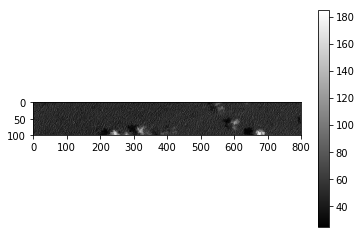

In [15]:
# tempimg = img0[:,:,:] #copy everything!
tempimg = img0[100:200,100:900,0] # copy selected stuff!
tempfigure = plt.imshow(tempimg,cmap=plt.cm.gray)
plt.colorbar()
print(tempimg.shape)

Note : Color comes about due to mixing of the amount of intensity in the three channels. When only one channel is passed, then there is no color. To stress this - a gray color map has been used above. If this would not be used, the plotting function automatically uses some heatmap for this plot - giving the false impression of color! 

## Try1 - Simple M1

(1024, 1024, 3)

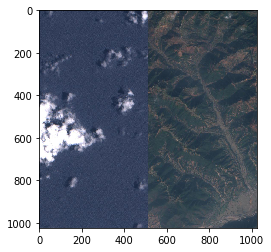

In [16]:
m1try1 = np.empty((1024,1024,3),dtype=int)
m1try1[:,:512,:] = img0[:,:512,:].copy()
m1try1[:,512:,:] = img1[:,512:,:].copy()
m1try1fig = plt.imshow(m1try1, cmap=plt.cm.gray)
m1try1.shape

## Trying to select areas within images according to method 3 of my notes.

## The following functions are defined:

In [17]:
def pickonetestimg(height,width,imgtype,inputlabel=None):
    """
    A function to randomly pick an image from the test folders. 
    The function can take label as integer for input. If none is provided a random number is generated.
    The function outputs a label integer, file path and the image as numpy array itself.
    """
    # if user gives input take that otherwise take random value
    check = [0,1,2,3,4]
    if inputlabel in check:
        label = inputlabel
    else:
        # random number to chose terrain
        label = np.random.randint(0,high=5)
    rand_file = random.choice(filenametable.at[foldnames[imgtype],terrains[label]])
    file_path = projectpath+'/tiles'+'/'+terrains[label]+'/'+foldnames[imgtype]+'/'+rand_file
    randimg = mpimg.imread(file_path)
    xstart= np.random.randint(0,high=width)
    ystart= np.random.randint(0,high=height)
    return label,file_path,randimg,xstart,ystart
#     return label

In [18]:
def generatedataframe(nterrains,height, width, imgtype):
    """
    Store data associated to all images picked randomly within a dataframe. 
    """
    df_images = pd.DataFrame([])
    temp1 = pd.Series([])
    count = 1
    while count <=nterrains:
        temp1 = pd.Series(pickonetestimg(height, width, imgtype), name = 'temp')
        df_images[count] = temp1
        count += 1
    df_images.index=['label','path','img','xstart','ystart']
    return df_images

In [19]:
def generateone(nterrains,height,width, imgtype,k=0.01):
    """
    This function generates one composite image. It takes as input: number of terrains, size of image (in pixels) 
    and a k parameter. The k parameter adds some irregularity to the generated area 
    (ensuring it is not an exact circle).
    There are 3 output: labelarray, image and a dataframe containing the information regarding the composition of 
    the newly created image (output of generatedtaframe()).
    
    NOTE - Last output has been removed!
    """
    newimg = np.zeros([height,width,3],dtype=int)
    labelarray = np.zeros([height,width,1],dtype=int)
    #     k = 0.01
    #loop over number of terrains : note - number of times to run is nterrains - 1
    
    # area/terrain in pixels (will be used as a rough-guide to distribute the terrains over an image)
    areaperterrain = height*width/nterrains
    # rough radius for above area (assuming circular geometry)
    radius = math.floor(math.sqrt(areaperterrain/math.pi))
    df_images = generatedataframe(nterrains,height, width, imgtype)
    count = 1 
    while count <nterrains:
        xstart = df_images.at['xstart',count] 
        ystart = df_images.at['ystart',count]
#         print('The starting point is %d, %d' %(xstart,ystart))
        for xind in np.arange(width):
            for yind in np.arange(height):
                dist = math.sqrt((xstart-xind)**2+(ystart-yind)**2)
#                 delradius = np.random.randint(0,high=radius*k)
#  The above line gives problems when the radius is too small or nterrains too high.
#  A different implementation of the same is used below:
                delradius = np.random.random()*radius*k
                finalradius = radius + delradius
                if newimg[yind,xind,:].all()==0:
                    if dist<=finalradius:
                        newimg[yind,xind,:]=df_images.at['img',count][yind,xind,:]
                        labelarray[yind,xind,:]=df_images.at['label',count]
        count +=1
#     print('part 1 is done')
# Finally put every remaining pixel to the last image
    for xind in np.arange(width):
        for yind in np.arange(height):
            if newimg[yind,xind,:].all()==0:
                newimg[yind,xind,:]=df_images.at['img',nterrains][yind,xind,:]
                labelarray[yind,xind,:]=df_images.at['label',nterrains]
    return labelarray,newimg

In [20]:
def masterfunction(nimages,nterrains,height,width,imgtype,k=0.01,):
    """
    A master function which is used to generate multiple composite images with one call. 
    All the output (labels, images, metadata about the images) is stored inside a dataframe
    imgtype = 0 for train, 1 for test
    """
    df_testdata = pd.DataFrame([])
    for j in np.arange(nimages):        
        temp1 = pd.Series(generateone(nterrains, height, width, imgtype, k), name = 'temp')
        df_testdata[j] = temp1
        print('I am done with image %d.'%(j))
    df_testdata.index=['Labels','ImageArray']
    return df_testdata

# Save Training Data

In [29]:
training_100_1_512_512.to_pickle(projectpath  + '/training_100_1_512_512.df')

# Finally Calling MasterFunction To Generate Composite Images

## Note - to avoid accidently calling the following functions again, one line of the masterfunction is commented. Uncomment this line for a successful call to this function.

In [ ]:
%%time
composite_50_8_512_512 = masterfunction(50,8,512,512,1)
composite_50_8_512_512.to_pickle(projectpath + '/generated_test_images/'+ 'composite_50_8_512_512.df')

## Sample of the above images

# Save Training Data - different sizes:
1. 64x64 - 100 images - 5(diff nterrains possibe: 2, 4, 6, 8, 10) with 20 images each(nterrain).
2. 128x128 - 100 images - 5 (same as above)

First for, 64x64 images - These are only for quicking the training process!

In [105]:
%%time
traincomposite_30_2_64_64 = masterfunction(30,2,64,64,0,0.1)
traincomposite_30_2_64_64.to_pickle(projectpath + '/traincomposite_30_2_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
CPU times: user 21.4 s, sys: 1.96 s, total: 23.3 s
Wall time: 22.2 s


In [106]:
%%time
traincomposite_30_4_64_64 = masterfunction(30,4,64,64,0,0.1)
traincomposite_30_4_64_64.to_pickle(projectpath + '/traincomposite_30_4_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
CPU times: user 33.5 s, sys: 2.75 s, total: 36.2 s
Wall time: 35.4 s


In [107]:
%%time
traincomposite_30_6_64_64 = masterfunction(30,6,64,64,0,0.1)
traincomposite_30_6_64_64.to_pickle(projectpath + '/traincomposite_30_6_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
CPU times: user 45.7 s, sys: 3.44 s, total: 49.1 s
Wall time: 48.6 s


Now for 128x128 images

In [ ]:
%%time
traincomposite_20_2_128_128 = masterfunction(20,2,128,128,0)
traincomposite_20_2_128_128.to_pickle(projectpath + '/traincomposite_20_2_128_128.df')

In [ ]:
%%time
traincomposite_20_4_128_128 = masterfunction(20,4,128,128,0)
traincomposite_20_4_128_128.to_pickle(projectpath + '/traincomposite_20_4_128_128.df')

In [ ]:
%%time
traincomposite_20_6_128_128 = masterfunction(20,6,128,128,0)
traincomposite_20_6_128_128.to_pickle(projectpath + '/traincomposite_20_6_128_128.df')

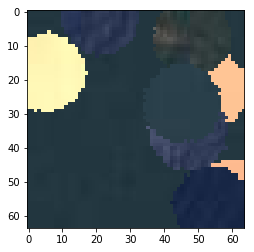

In [108]:
a,b,c = generateone(10,64,64,0,0.1)
plt.imshow(b)

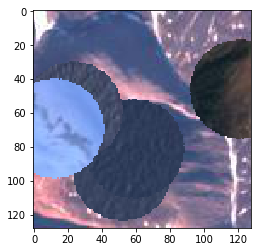

In [109]:
a,b,c = generateone(6,128,128,0)
plt.imshow(b)

In [14]:
%%time
traincomposite_50_2_64_64 = masterfunction(50,2,64,64,0,0.1)
traincomposite_50_2_64_64.to_pickle(projectpath + '/traincomposite_50_2_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
I am done with image 30.
I am done with image 31.
I am done with image 32.
I am done with image 33.
I am done with image 34.
I am done with image 35.
I am done with image 36.
I am done with image 37.
I am done with image 38.
I am done with image 39.
I am done 

In [15]:
%%time
traincomposite_50_6_64_64 = masterfunction(50,6,64,64,0,0.1)
traincomposite_50_6_64_64.to_pickle(projectpath + '/traincomposite_50_6_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
I am done with image 30.
I am done with image 31.
I am done with image 32.
I am done with image 33.
I am done with image 34.
I am done with image 35.
I am done with image 36.
I am done with image 37.
I am done with image 38.
I am done with image 39.
I am done 

In [16]:
%%time
traincomposite_50_6_64_64 = masterfunction(50,6,64,64,0,0.1)
traincomposite_50_6_64_64.to_pickle(projectpath + '/traincomposite_50_6_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
I am done with image 30.
I am done with image 31.
I am done with image 32.
I am done with image 33.
I am done with image 34.
I am done with image 35.
I am done with image 36.
I am done with image 37.
I am done with image 38.
I am done with image 39.
I am done 

In [17]:
%%time
testcomposite_20_2_64_64 = masterfunction(20,2,64,64,1,0.1)
testcomposite_20_2_64_64.to_pickle(projectpath + '/testcomposite_20_2_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
CPU times: user 2.91 s, sys: 144 ms, total: 3.06 s
Wall time: 2.98 s


In [18]:
%%time
testcomposite_20_4_64_64 = masterfunction(20,4,64,64,1,0.1)
testcomposite_20_4_64_64.to_pickle(projectpath + '/testcomposite_20_4_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
CPU times: user 4.67 s, sys: 225 ms, total: 4.9 s
Wall time: 4.85 s


In [19]:
%%time
testcomposite_20_6_64_64 = masterfunction(20,6,64,64,1,0.1)
testcomposite_20_6_64_64.to_pickle(projectpath + '/testcomposite_20_6_64_64.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
CPU times: user 6.64 s, sys: 508 ms, total: 7.15 s
Wall time: 6.9 s


## Saving test/train image of 512x512

In [37]:
%%time
traincomposite_50_2_512_512 = masterfunction(50,2,512,512,0)
traincomposite_50_2_512_512.to_pickle(projectpath + '/traincomposite_50_2_512_512.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
I am done with image 30.
I am done with image 31.
I am done with image 32.
I am done with image 33.
I am done with image 34.
I am done with image 35.
I am done with image 36.
I am done with image 37.
I am done with image 38.
I am done with image 39.
I am done 

In [41]:
%%time
traincomposite_50_4_512_512 = masterfunction(50,4,512,512,0)
traincomposite_50_4_512_512.to_pickle(projectpath + '/traincomposite_50_4_512_512.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
I am done with image 30.
I am done with image 31.
I am done with image 32.
I am done with image 33.
I am done with image 34.
I am done with image 35.
I am done with image 36.
I am done with image 37.
I am done with image 38.
I am done with image 39.
I am done 

In [52]:
%%time
traincomposite_50_6_512_512 = masterfunction(50,6,512,512,0)
traincomposite_50_6_512_512.to_pickle(projectpath + '/traincomposite_50_6_512_512.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
I am done with image 30.
I am done with image 31.
I am done with image 32.
I am done with image 33.
I am done with image 34.
I am done with image 35.
I am done with image 36.
I am done with image 37.
I am done with image 38.
I am done with image 39.
I am done 

In [38]:
%%time
testcomposite_30_2_512_512 = masterfunction(30,2,512,512,1)
testcomposite_30_2_512_512.to_pickle(projectpath + '/testcomposite_30_2_512_512.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
CPU times: user 3min 49s, sys: 5.58 s, total: 3min 54s
Wall time: 3min 48s


In [39]:
%%time
testcomposite_30_4_512_512 = masterfunction(30,4,512,512,1)
testcomposite_30_4_512_512.to_pickle(projectpath + '/testcomposite_30_4_512_512.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
CPU times: user 5min 31s, sys: 5.48 s, total: 5min 37s
Wall time: 5min 31s


In [40]:
%%time
testcomposite_30_6_512_512 = masterfunction(30,6,512,512,1)
testcomposite_30_6_512_512.to_pickle(projectpath + '/testcomposite_30_6_512_512.df')

I am done with image 0.
I am done with image 1.
I am done with image 2.
I am done with image 3.
I am done with image 4.
I am done with image 5.
I am done with image 6.
I am done with image 7.
I am done with image 8.
I am done with image 9.
I am done with image 10.
I am done with image 11.
I am done with image 12.
I am done with image 13.
I am done with image 14.
I am done with image 15.
I am done with image 16.
I am done with image 17.
I am done with image 18.
I am done with image 19.
I am done with image 20.
I am done with image 21.
I am done with image 22.
I am done with image 23.
I am done with image 24.
I am done with image 25.
I am done with image 26.
I am done with image 27.
I am done with image 28.
I am done with image 29.
CPU times: user 7min 13s, sys: 7.05 s, total: 7min 20s
Wall time: 7min 13s


# 1x1 images for pixel-test

In [45]:
traincomposite_150_1_1_1 = pd.DataFrame([])
for j in np.arange(150):        
    temp1 = pd.Series(generateone(10, 1, 1, 0, 0), name = 'temp')
    traincomposite_150_1_1_1[j] = temp1
#     print('I am done with image %d.'%(j))
traincomposite_150_1_1_1.index=['Labels','ImageArray']
traincomposite_150_1_1_1.shape
traincomposite_150_1_1_1.to_pickle(projectpath + '/traincomposite_150_1_1_1.df')

In [47]:
testcomposite_90_1_1_1 = pd.DataFrame([])
for j in np.arange(90):        
    temp1 = pd.Series(generateone(10, 1, 1, 0, 0), name = 'temp')
    testcomposite_90_1_1_1[j] = temp1
#     print('I am done with image %d.'%(j))
testcomposite_90_1_1_1.index=['Labels','ImageArray']
testcomposite_90_1_1_1.shape
testcomposite_90_1_1_1.to_pickle(projectpath + '/testcomposite_90_1_1_1.df')